<h1>UNAD - Universidad Nacional Abierta y a Distancia</h1>

<h3>Estudiante<br>
<b>Victor Javier Fortich Carabali</b><br>
Ingeniería de Sistemas</h3>

<p><h2><b>Arboles de Decisión</b></h2>
<b>Calidad del vino tinto</b><br>
Los dos conjuntos de datos están relacionados con las variantes tinta y blanca del vino portugués "Vinho Verde". Para más detalles, consultar la referencia [Cortez et al., 2009]. Debido a cuestiones de privacidad y logística, sólo están disponibles variables fisicoquímicas (entradas) y sensoriales (salidas) (por ejemplo, no hay datos sobre tipos de uva, marca de vino, precio de venta del vino, etc.).</p>

<br><b>Pasos de la Actividad</b><br>
<ol>
<li>Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.</li>
<li>Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario</li>
<li>Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características</li>
<li>Dividir el dataset en Train y Test para evaluar correctamente el modelo</li>
<li>Entrenar el modelo configurando los diferentes hiperparámetros</li>
<li>Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc</li>
<li>Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.</li>
<li>Interpretar, analizar y documentar los resultados obtenidos</li>
<li>Crear una cuenta en GitHub y cargar los códigos de los modelos diseñados https://github.com/</li>
</ol>
<p></p>

<h2> Desarrollo de la actividad</h2>

<h3><b>1. Realizaaar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.</b></h3>

In [59]:
#Librerias
import pandas as pd                # Sirve para el manejo y análisis de estructuras de datos
import numpy as np                 # Sirve para cálcular el numérico y el análisis de datos
import seaborn as sns              # Sirve para la creación gráficos estadísticos
import matplotlib.pyplot as plt    # Sirve para la creación de gráficos en dos dimensiones

#Librerías - Modelos de ciencia de datos
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [60]:
#Lectura de datos en Python y lo cargamos en la variable DatosRegresionLineal
DatosArboldeDecisiones = pd.read_csv('./BD Arbol de Decisiones.csv')

In [61]:
#Se realiza la lectura de los Datos para el análisis exploratorio
DatosArboldeDecisiones.head(20)

,Acidez_Fija,Acidez_Volatil,Acido_Citrico,Azucar_Residual,Cloruros,Dioxido_de_Azufre_Libre,Dioxido_de_Azufre_Total,Densidad,PH,Sulfatos,Alcohol,Calidad
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [62]:
#Descripción del archivo
DatosArboldeDecisiones.describe()

,Acidez_Fija,Acidez_Volatil,Acido_Citrico,Azucar_Residual,Cloruros,Dioxido_de_Azufre_Libre,Dioxido_de_Azufre_Total,Densidad,PH,Sulfatos,Alcohol,Calidad
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [63]:
#Descripción del archivo
DatosArboldeDecisiones.shape

(1599, 12)

In [64]:
#Descripción del archivo
DatosArboldeDecisiones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Acidez_Fija              1599 non-null   float64
 1   Acidez_Volatil           1599 non-null   float64
 2   Acido_Citrico            1599 non-null   float64
 3   Azucar_Residual          1599 non-null   float64
 4   Cloruros                 1599 non-null   float64
 5   Dioxido_de_Azufre_Libre  1599 non-null   float64
 6   Dioxido_de_Azufre_Total  1599 non-null   float64
 7   Densidad                 1599 non-null   float64
 8   PH                       1599 non-null   float64
 9   Sulfatos                 1599 non-null   float64
 10  Alcohol                  1599 non-null   float64
 11  Calidad                  1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [65]:
#Descripción del archivo
DatosArboldeDecisiones.isna().sum()

Acidez_Fija                0
Acidez_Volatil             0
Acido_Citrico              0
Azucar_Residual            0
Cloruros                   0
Dioxido_de_Azufre_Libre    0
Dioxido_de_Azufre_Total    0
Densidad                   0
PH                         0
Sulfatos                   0
Alcohol                    0
Calidad                    0
dtype: int64

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos - Acido_Citrico')

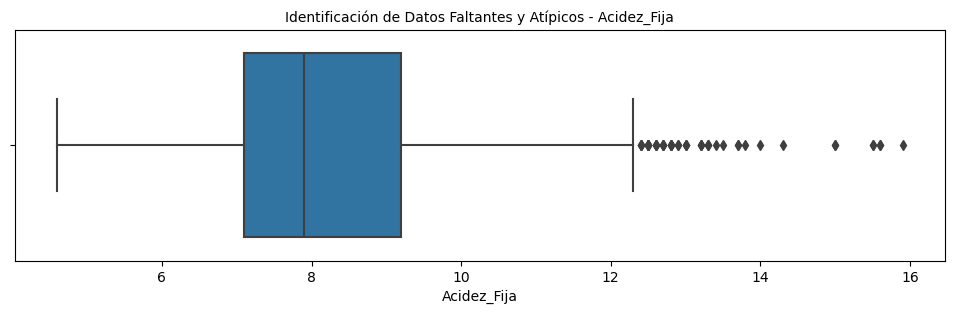

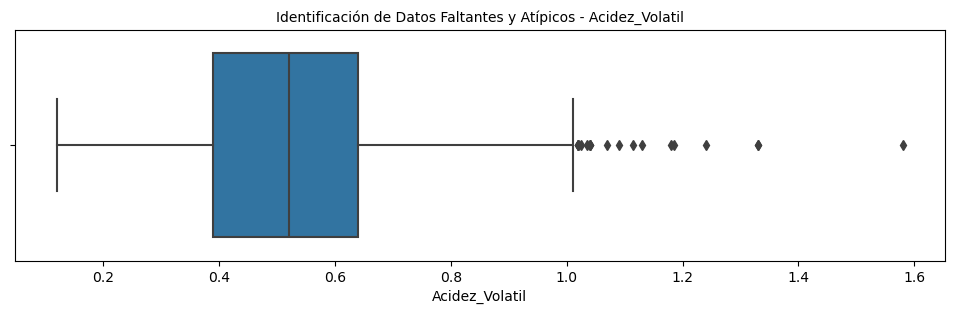

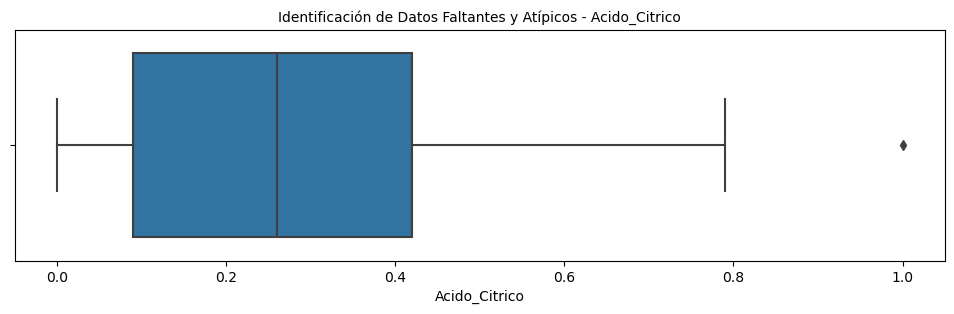

In [66]:
#Identificación de los Datos faltantes y los atípicos
plt.figure(figsize=(12, 3))
sns.boxplot(x=DatosArboldeDecisiones['Acidez_Fija'])
plt.title('Identificación de Datos Faltantes y Atípicos - Acidez_Fija', fontsize=10 )

plt.figure(figsize=(12, 3))
sns.boxplot(x=DatosArboldeDecisiones['Acidez_Volatil'])
plt.title('Identificación de Datos Faltantes y Atípicos - Acidez_Volatil', fontsize=10 )

plt.figure(figsize=(12, 3))
sns.boxplot(x=DatosArboldeDecisiones['Acido_Citrico'])
plt.title('Identificación de Datos Faltantes y Atípicos - Acido_Citrico', fontsize=10 )

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos - Dioxido_de_Azufre_Libre')

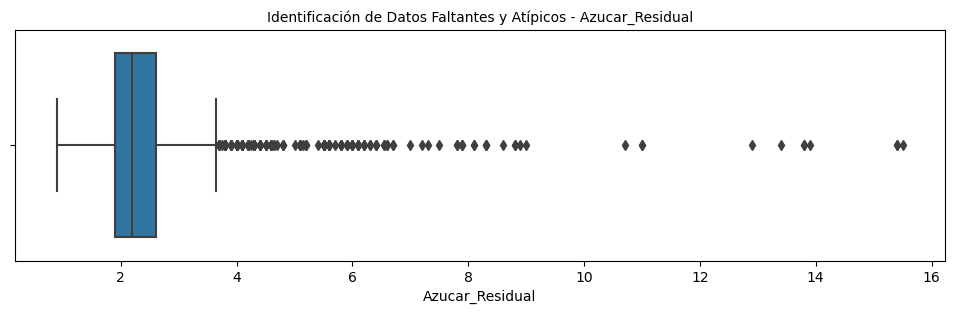

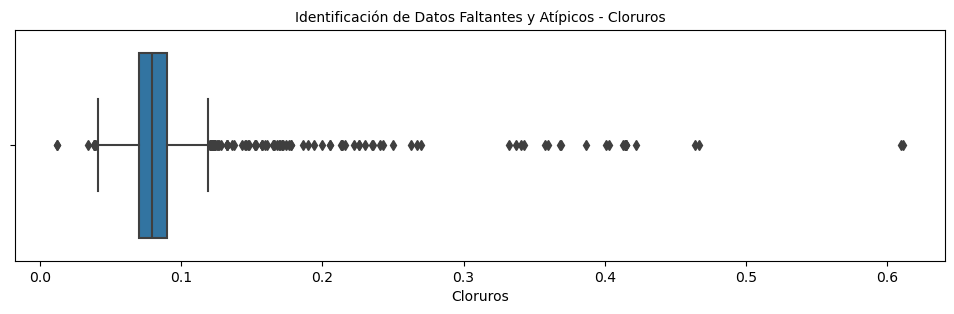

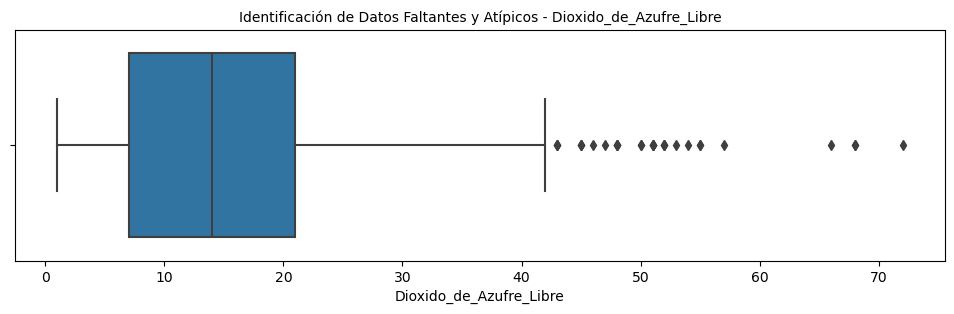

In [67]:
#Identificación de los Datos faltantes y los atípicos
plt.figure(figsize=(12, 3))
sns.boxplot(x=DatosArboldeDecisiones['Azucar_Residual'])
plt.title('Identificación de Datos Faltantes y Atípicos - Azucar_Residual', fontsize=10 )

plt.figure(figsize=(12, 3))
sns.boxplot(x=DatosArboldeDecisiones['Cloruros'])
plt.title('Identificación de Datos Faltantes y Atípicos - Cloruros', fontsize=10 )

plt.figure(figsize=(12, 3))
sns.boxplot(x=DatosArboldeDecisiones['Dioxido_de_Azufre_Libre'])
plt.title('Identificación de Datos Faltantes y Atípicos - Dioxido_de_Azufre_Libre', fontsize=10 )

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos - PH')

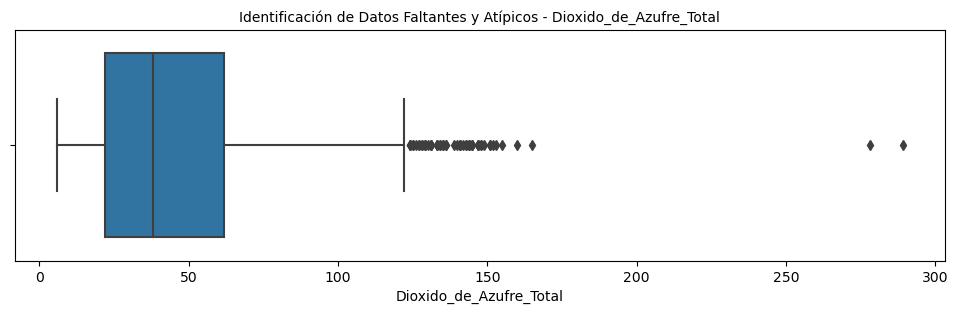

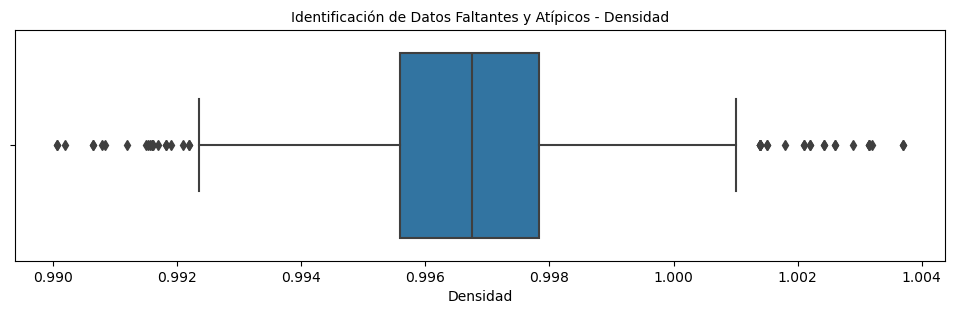

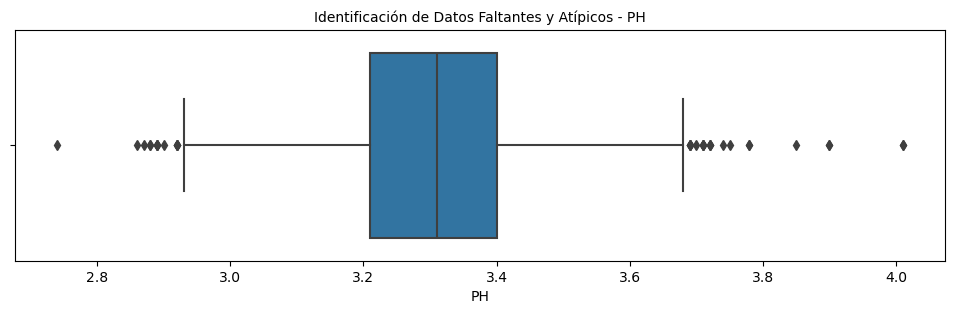

In [68]:
#Identificación de los Datos faltantes y los atípicos
plt.figure(figsize=(12, 3))
sns.boxplot(x=DatosArboldeDecisiones['Dioxido_de_Azufre_Total'])
plt.title('Identificación de Datos Faltantes y Atípicos - Dioxido_de_Azufre_Total', fontsize=10 )

plt.figure(figsize=(12, 3))
sns.boxplot(x=DatosArboldeDecisiones['Densidad'])
plt.title('Identificación de Datos Faltantes y Atípicos - Densidad', fontsize=10 )

plt.figure(figsize=(12, 3))
sns.boxplot(x=DatosArboldeDecisiones['PH'])
plt.title('Identificación de Datos Faltantes y Atípicos - PH', fontsize=10 )

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos - Calidad')

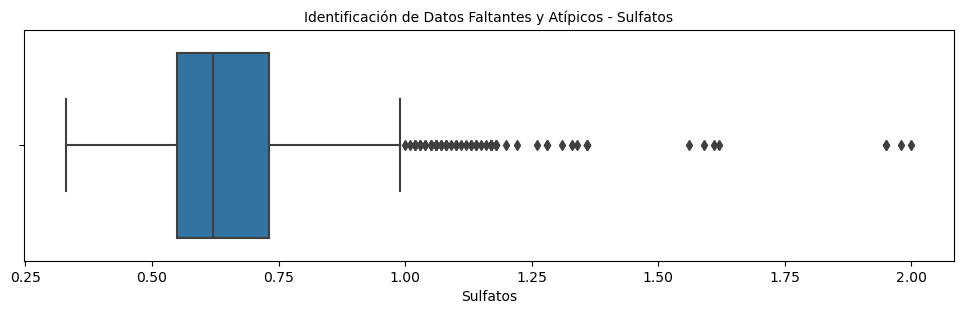

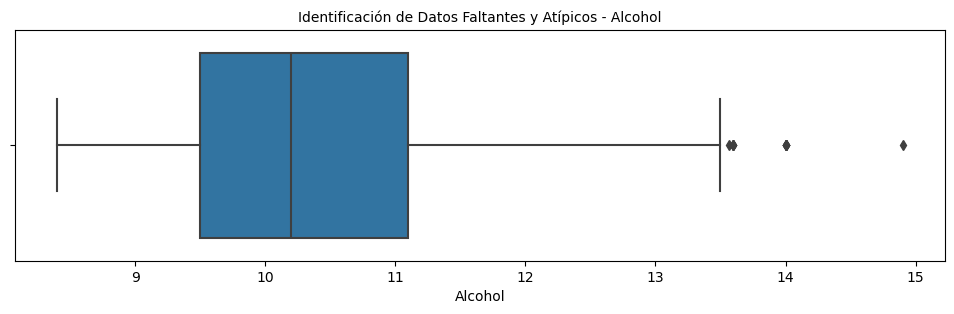

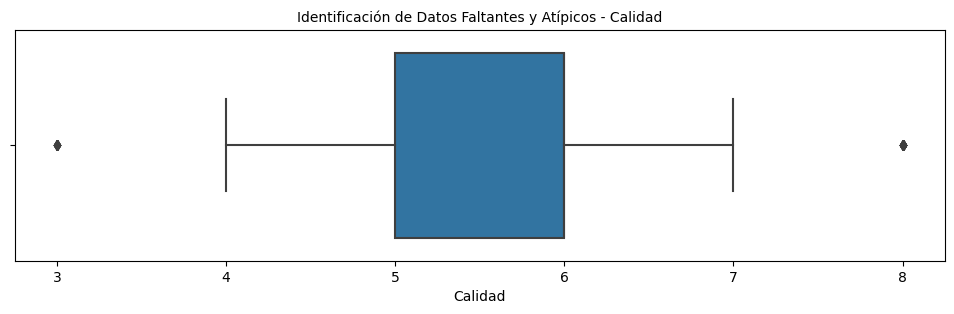

In [69]:
#Identificación de los Datos faltantes y los atípicos
plt.figure(figsize=(12, 3))
sns.boxplot(x=DatosArboldeDecisiones['Sulfatos'])
plt.title('Identificación de Datos Faltantes y Atípicos - Sulfatos', fontsize=10 )

plt.figure(figsize=(12, 3))
sns.boxplot(x=DatosArboldeDecisiones['Alcohol'])
plt.title('Identificación de Datos Faltantes y Atípicos - Alcohol', fontsize=10 )

plt.figure(figsize=(12, 3))
sns.boxplot(x=DatosArboldeDecisiones['Calidad'])
plt.title('Identificación de Datos Faltantes y Atípicos - Calidad', fontsize=10 )

<h3><b>2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.</b></h3>

In [70]:
#procesar datos limpiandolos, tratando valores y Revisión de datos faltantes
print("Cantidad de Registros con cero en Acidez_Volatil:                        ",DatosArboldeDecisiones['Acidez_Volatil'].isin([0]).sum())
print("Cantidad de Registros con cero en Acido_Citrico:                         ",DatosArboldeDecisiones['Acido_Citrico'].isin([0]).sum())
print("Cantidad de Registros con cero en Azucar_Residual:                       ",DatosArboldeDecisiones['Azucar_Residual'].isin([0]).sum())
print("Cantidad de Registros con cero en Cloruros:                              ",DatosArboldeDecisiones['Cloruros'].isin([0]).sum())
print("Cantidad de Registros con cero en Dioxido_de_Azufre_Libre:               ",DatosArboldeDecisiones['Dioxido_de_Azufre_Libre'].isin([0]).sum())
print("Cantidad de Registros con cero en Dioxido_de_Azufre_Total:               ",DatosArboldeDecisiones['Dioxido_de_Azufre_Total'].isin([0]).sum())
print("Cantidad de Registros con cero en Densidad:                              ",DatosArboldeDecisiones['Densidad'].isin([0]).sum())
print("Cantidad de Registros con cero en PH:                                    ",DatosArboldeDecisiones['PH'].isin([0]).sum())
print("Cantidad de Registros con cero en Sulfatos:                              ",DatosArboldeDecisiones['Sulfatos'].isin([0]).sum())
print("Cantidad de Registros con cero en Alcohol:                               ",DatosArboldeDecisiones['Alcohol'].isin([0]).sum())
print("Cantidad de Registros con cero en Calidad:                               ",DatosArboldeDecisiones['Calidad'].isin([0]).sum())

Cantidad de Registros con cero en Acidez_Volatil:                         0
Cantidad de Registros con cero en Acido_Citrico:                          132
Cantidad de Registros con cero en Azucar_Residual:                        0
Cantidad de Registros con cero en Cloruros:                               0
Cantidad de Registros con cero en Dioxido_de_Azufre_Libre:                0
Cantidad de Registros con cero en Dioxido_de_Azufre_Total:                0
Cantidad de Registros con cero en Densidad:                               0
Cantidad de Registros con cero en PH:                                     0
Cantidad de Registros con cero en Sulfatos:                               0
Cantidad de Registros con cero en Alcohol:                                0
Cantidad de Registros con cero en Calidad:                                0


In [71]:
#procesar datos limpiandolos, tratando valores y Revisión de datos faltantes
print("Cantidad de Registros con cero en Acidez_Volatil:                        ",DatosArboldeDecisiones['Acidez_Volatil'].isnull().sum())
print("Cantidad de Registros con cero en Acido_Citrico:                         ",DatosArboldeDecisiones['Acido_Citrico'].isnull().sum())
print("Cantidad de Registros con cero en Azucar_Residual:                       ",DatosArboldeDecisiones['Azucar_Residual'].isnull().sum())
print("Cantidad de Registros con cero en Cloruros:                              ",DatosArboldeDecisiones['Cloruros'].isnull().sum())
print("Cantidad de Registros con cero en Dioxido_de_Azufre_Libre:               ",DatosArboldeDecisiones['Dioxido_de_Azufre_Libre'].isnull().sum())
print("Cantidad de Registros con cero en Dioxido_de_Azufre_Total:               ",DatosArboldeDecisiones['Dioxido_de_Azufre_Total'].isnull().sum())
print("Cantidad de Registros con cero en Densidad:                              ",DatosArboldeDecisiones['Densidad'].isnull().sum())
print("Cantidad de Registros con cero en PH:                                    ",DatosArboldeDecisiones['PH'].isnull().sum())
print("Cantidad de Registros con cero en Sulfatos:                              ",DatosArboldeDecisiones['Sulfatos'].isnull().sum())
print("Cantidad de Registros con cero en Alcohol:                               ",DatosArboldeDecisiones['Alcohol'].isnull().sum())
print("Cantidad de Registros con cero en Calidad:                               ",DatosArboldeDecisiones['Calidad'].isnull().sum())

Cantidad de Registros con cero en Acidez_Volatil:                         0
Cantidad de Registros con cero en Acido_Citrico:                          0
Cantidad de Registros con cero en Azucar_Residual:                        0
Cantidad de Registros con cero en Cloruros:                               0
Cantidad de Registros con cero en Dioxido_de_Azufre_Libre:                0
Cantidad de Registros con cero en Dioxido_de_Azufre_Total:                0
Cantidad de Registros con cero en Densidad:                               0
Cantidad de Registros con cero en PH:                                     0
Cantidad de Registros con cero en Sulfatos:                               0
Cantidad de Registros con cero en Alcohol:                                0
Cantidad de Registros con cero en Calidad:                                0


In [72]:
#Conteo de Datos Atípicos
print("------------------DATOS ATIPICOS - LISTADO ENCONTRADO----------")

Nivel_Minimo=0
Nivel_Maximo=1.5
Total_Atipicos=((DatosArboldeDecisiones['Acidez_Volatil']<Nivel_Minimo)|(DatosArboldeDecisiones['Acidez_Volatil']>Nivel_Maximo)).sum()
print("El Total de los datos atípicos es (Acidez_Volatil):          {}".format(Total_Atipicos))

Nivel_Minimo=0
Nivel_Maximo=0.9
Total_Atipicos=((DatosArboldeDecisiones['Acido_Citrico']<Nivel_Minimo)|(DatosArboldeDecisiones['Acido_Citrico']>Nivel_Maximo)).sum()
print("El Total de los datos atípicos es (Acido_Citrico):           {}".format(Total_Atipicos))


Nivel_Minimo=0
Nivel_Maximo=0.6
Total_Atipicos=((DatosArboldeDecisiones['Cloruros']<Nivel_Minimo)|(DatosArboldeDecisiones['Cloruros']>Nivel_Maximo)).sum()
print("El Total de los datos atípicos es (Cloruros):                {}".format(Total_Atipicos))

Nivel_Minimo=0
Nivel_Maximo=250
Total_Atipicos=((DatosArboldeDecisiones['Dioxido_de_Azufre_Total']<Nivel_Minimo)|(DatosArboldeDecisiones['Dioxido_de_Azufre_Total']>Nivel_Maximo)).sum()
print("El Total de los datos atípicos es (Dioxido_de_Azufre_Total): {}".format(Total_Atipicos))

Nivel_Minimo=2.8
Nivel_Maximo=4
Total_Atipicos=((DatosArboldeDecisiones['PH']<Nivel_Minimo)|(DatosArboldeDecisiones['PH']>Nivel_Maximo)).sum()
print("El Total de los datos atípicos es (PH):                      {}".format(Total_Atipicos))

------------------DATOS ATIPICOS - LISTADO ENCONTRADO----------
El Total de los datos atípicos es (Acidez_Volatil):          1
El Total de los datos atípicos es (Acido_Citrico):           1
El Total de los datos atípicos es (Cloruros):                2
El Total de los datos atípicos es (Dioxido_de_Azufre_Total): 2
El Total de los datos atípicos es (PH):                      3


In [73]:
#Conteo de Datos Atípicos
print("------------------DATOS ATIPICOS - LISTADO ENCONTRADO----------")

Nivel_Minimo=0
Nivel_Maximo=1.5
DatosArboldeDecisiones=DatosArboldeDecisiones[(DatosArboldeDecisiones['Acidez_Volatil']<Nivel_Maximo)&(DatosArboldeDecisiones['Acidez_Volatil']>Nivel_Minimo)]
Total_Atipicos=((DatosArboldeDecisiones['Acidez_Volatil']<Nivel_Minimo)|(DatosArboldeDecisiones['Acidez_Volatil']>Nivel_Maximo)).sum()
print("El Total de los datos atípicos es (Acidez_Volatil):          {}".format(Total_Atipicos))

Nivel_Minimo=0
Nivel_Maximo=0.9
DatosArboldeDecisiones=DatosArboldeDecisiones[(DatosArboldeDecisiones['Acido_Citrico']<Nivel_Maximo)&(DatosArboldeDecisiones['Acido_Citrico']>Nivel_Minimo)]
Total_Atipicos=((DatosArboldeDecisiones['Acido_Citrico']<Nivel_Minimo)|(DatosArboldeDecisiones['Acido_Citrico']>Nivel_Maximo)).sum()
print("El Total de los datos atípicos es (Acido_Citrico):           {}".format(Total_Atipicos))


Nivel_Minimo=0
Nivel_Maximo=0.6
DatosArboldeDecisiones=DatosArboldeDecisiones[(DatosArboldeDecisiones['Cloruros']<Nivel_Maximo)&(DatosArboldeDecisiones['Cloruros']>Nivel_Minimo)]
Total_Atipicos=((DatosArboldeDecisiones['Cloruros']<Nivel_Minimo)|(DatosArboldeDecisiones['Cloruros']>Nivel_Maximo)).sum()
print("El Total de los datos atípicos es (Cloruros):                {}".format(Total_Atipicos))

Nivel_Minimo=0
Nivel_Maximo=250
DatosArboldeDecisiones=DatosArboldeDecisiones[(DatosArboldeDecisiones['Dioxido_de_Azufre_Total']<Nivel_Maximo)&(DatosArboldeDecisiones['Dioxido_de_Azufre_Total']>Nivel_Minimo)]
Total_Atipicos=((DatosArboldeDecisiones['Dioxido_de_Azufre_Total']<Nivel_Minimo)|(DatosArboldeDecisiones['Dioxido_de_Azufre_Total']>Nivel_Maximo)).sum()
print("El Total de los datos atípicos es (Dioxido_de_Azufre_Total): {}".format(Total_Atipicos))

Nivel_Minimo=2.8
Nivel_Maximo=4
DatosArboldeDecisiones=DatosArboldeDecisiones[(DatosArboldeDecisiones['PH']<Nivel_Maximo)&(DatosArboldeDecisiones['PH']>Nivel_Minimo)]
Total_Atipicos=((DatosArboldeDecisiones['PH']<Nivel_Minimo)|(DatosArboldeDecisiones['PH']>Nivel_Maximo)).sum()
print("El Total de los datos atípicos es (PH):                      {}".format(Total_Atipicos))

------------------DATOS ATIPICOS - LISTADO ENCONTRADO----------
El Total de los datos atípicos es (Acidez_Volatil):          0
El Total de los datos atípicos es (Acido_Citrico):           0
El Total de los datos atípicos es (Cloruros):                0
El Total de los datos atípicos es (Dioxido_de_Azufre_Total): 0
El Total de los datos atípicos es (PH):                      0


In [74]:
#Revisión del tipo de datos y datos faltantes
DatosArboldeDecisiones.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1463 entries, 2 to 1598
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Acidez_Fija              1463 non-null   float64
 1   Acidez_Volatil           1463 non-null   float64
 2   Acido_Citrico            1463 non-null   float64
 3   Azucar_Residual          1463 non-null   float64
 4   Cloruros                 1463 non-null   float64
 5   Dioxido_de_Azufre_Libre  1463 non-null   float64
 6   Dioxido_de_Azufre_Total  1463 non-null   float64
 7   Densidad                 1463 non-null   float64
 8   PH                       1463 non-null   float64
 9   Sulfatos                 1463 non-null   float64
 10  Alcohol                  1463 non-null   float64
 11  Calidad                  1463 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 148.6 KB


Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos - PH')

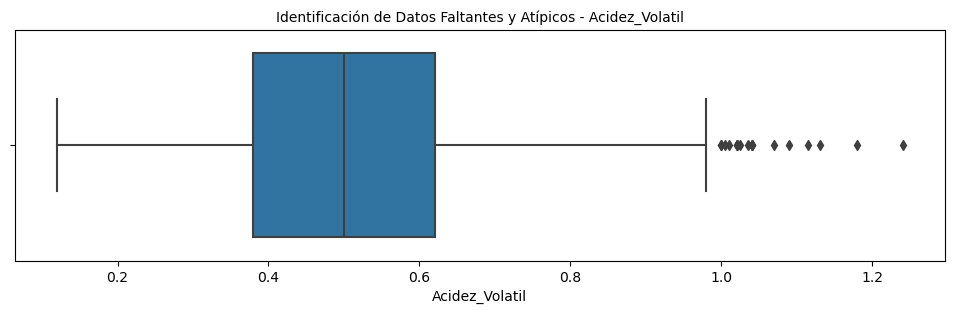

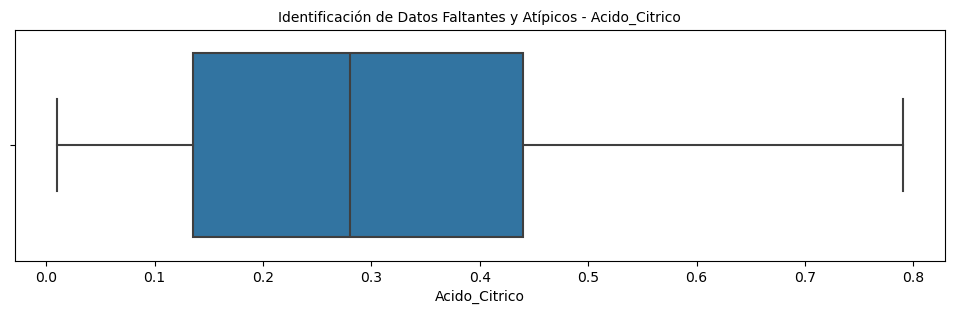

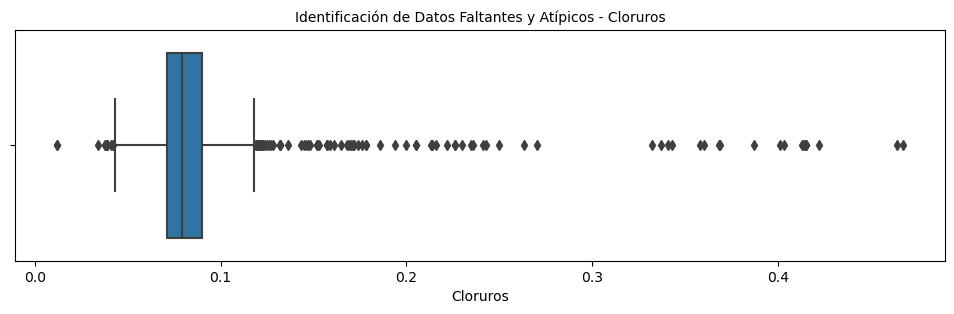

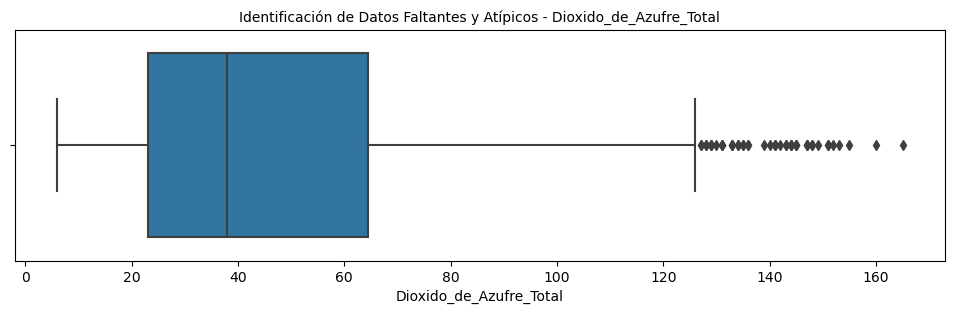

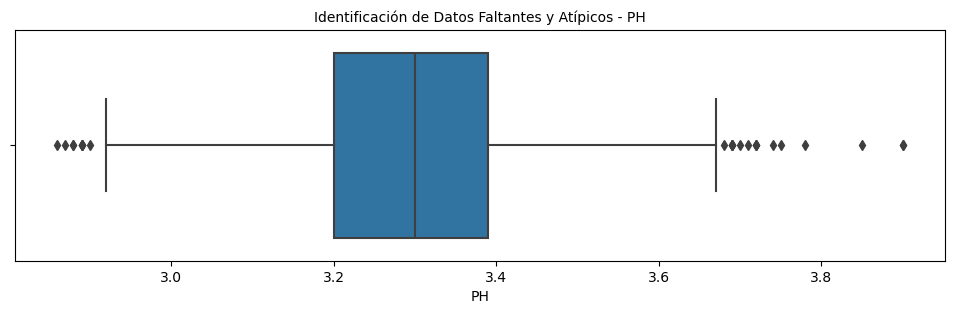

In [75]:
#Identificación de los datos atípicos
plt.figure(figsize=(12, 3))
sns.boxplot(x=DatosArboldeDecisiones['Acidez_Volatil'])
plt.title('Identificación de Datos Faltantes y Atípicos - Acidez_Volatil', fontsize=10 )

plt.figure(figsize=(12, 3))
sns.boxplot(x=DatosArboldeDecisiones['Acido_Citrico'])
plt.title('Identificación de Datos Faltantes y Atípicos - Acido_Citrico', fontsize=10 )

plt.figure(figsize=(12, 3))
sns.boxplot(x=DatosArboldeDecisiones['Cloruros'])
plt.title('Identificación de Datos Faltantes y Atípicos - Cloruros', fontsize=10 )

plt.figure(figsize=(12, 3))
sns.boxplot(x=DatosArboldeDecisiones['Dioxido_de_Azufre_Total'])
plt.title('Identificación de Datos Faltantes y Atípicos - Dioxido_de_Azufre_Total', fontsize=10 )

plt.figure(figsize=(12, 3))
sns.boxplot(x=DatosArboldeDecisiones['PH'])
plt.title('Identificación de Datos Faltantes y Atípicos - PH', fontsize=10 )

<h3><b>3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características.</b></h3>

In [76]:
# Caracteristica de interes:
#La calidad del vino basado en sus diferentes metricas de 1 a 10 en calidad Predecir la calidad del vino
DatosArboldeDecisiones['Calidad'].value_counts()

Calidad
5    623
6    584
7    189
4     42
8     18
3      7
Name: count, dtype: int64

(array([  7.,   0.,  42.,   0., 623.,   0., 584.,   0., 189.,  18.]),
 array([3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. ]),
 <BarContainer object of 10 artists>)

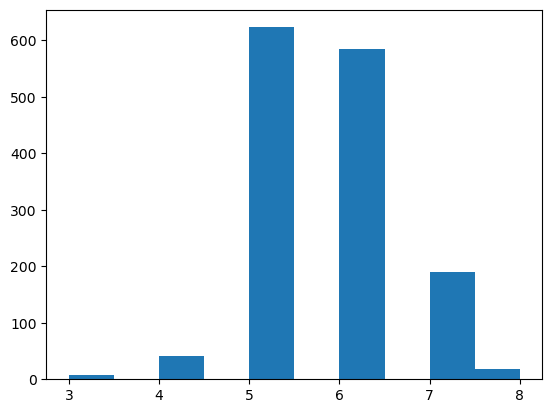

In [77]:
# Impresion de los primeros elementos en la dataset
plt.hist(DatosArboldeDecisiones['Calidad'])

<Axes: xlabel='Acido_Citrico', ylabel='Densidad'>

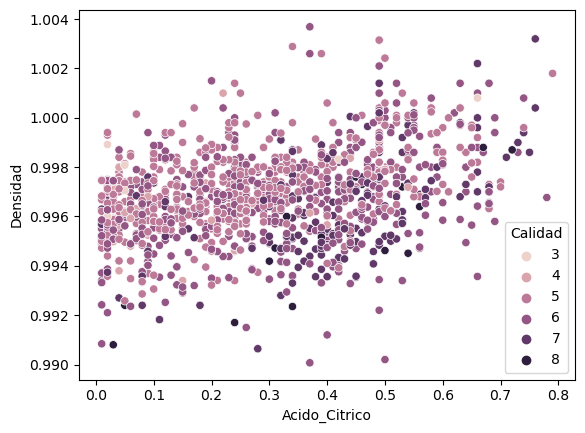

In [78]:
# Impresion de los primeros elementos en la dataset
sns.scatterplot(x = "Acido_Citrico", y = "Densidad", hue = "Calidad", data = DatosArboldeDecisiones)

<Axes: xlabel='Dioxido_de_Azufre_Total', ylabel='Dioxido_de_Azufre_Libre'>

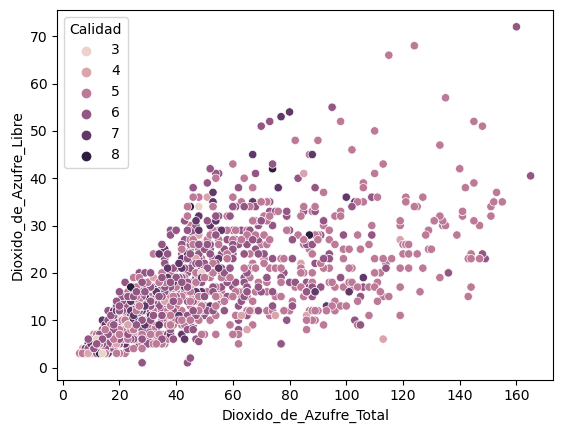

In [79]:
# Impresion de los primeros elementos en la dataset
sns.scatterplot(x = "Dioxido_de_Azufre_Total", y = "Dioxido_de_Azufre_Libre", hue = "Calidad", data = DatosArboldeDecisiones)

<h3><b>4. Dividir el dataset en Train y Test para evaluar correctamente el modelo.</b></h3>

In [80]:
#seleccionar el predictor
predictors = DatosArboldeDecisiones.drop('Calidad',axis=1)
target = DatosArboldeDecisiones['Calidad']

In [81]:
#Impresion el predictor
predictors.head()

,Acidez_Fija,Acidez_Volatil,Acido_Citrico,Azucar_Residual,Cloruros,Dioxido_de_Azufre_Libre,Dioxido_de_Azufre_Total,Densidad,PH,Sulfatos,Alcohol
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5


In [82]:
#Resultado el predictor
target.head()

2    5
3    6
6    5
8    7
9    5
Name: Calidad, dtype: int64

In [83]:
#Resultado corr
corr = predictors.corr()
corr

,Acidez_Fija,Acidez_Volatil,Acido_Citrico,Azucar_Residual,Cloruros,Dioxido_de_Azufre_Libre,Dioxido_de_Azufre_Total,Densidad,PH,Sulfatos,Alcohol
Acidez_Fija,1.000000,-0.236939,0.666904,0.104310,0.094333,-0.163268,-0.147599,0.665666,-0.674330,0.179788,-0.026545
Acidez_Volatil,-0.236939,1.000000,-0.524989,0.021743,0.066855,0.021648,0.155366,0.040128,0.181033,-0.250110,-0.220048
Acido_Citrico,0.666904,-0.524989,1.000000,0.121329,0.188960,-0.087914,-0.045480,0.366556,-0.496070,0.295140,0.143849
Azucar_Residual,0.104310,0.021743,0.121329,1.000000,0.058856,0.182291,0.166827,0.366320,-0.058374,0.003427,0.045861
Cloruros,0.094333,0.066855,0.188960,0.058856,1.000000,0.006819,0.059174,0.199270,-0.258906,0.344294,-0.220812
Dioxido_de_Azufre_Libre,-0.163268,0.021648,-0.087914,0.182291,0.006819,1.000000,0.677797,-0.014539,0.094341,0.037064,-0.090048
Dioxido_de_Azufre_Total,-0.147599,0.155366,-0.045480,0.166827,0.059174,0.677797,1.000000,0.083269,-0.020196,0.027155,-0.250550
Densidad,0.665666,0.040128,0.366556,0.366320,0.199270,-0.014539,0.083269,1.000000,-0.322551,0.136936,-0.462337
PH,-0.674330,0.181033,-0.496070,-0.058374,-0.258906,0.094341,-0.020196,-0.322551,1.000000,-0.189868,0.176731
Sulfatos,0.179788,-0.250110,0.295140,0.003427,0.344294,0.037064,0.027155,0.136936,-0.189868,1.000000,0.103249


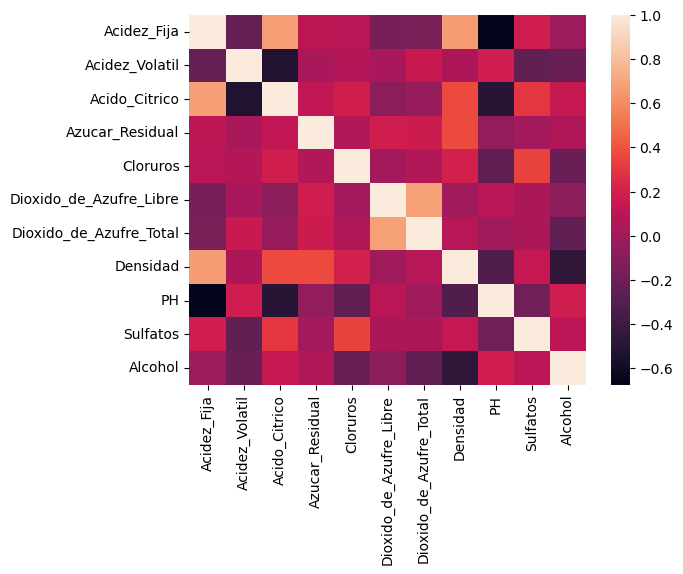

In [84]:
#Resultado corr
sns.heatmap(corr)
plt.show()

<h3><b>5. Entrenar el modelo configurando los diferentes hiperparámetros.</b></h3>

In [85]:
# Porcentaje de datos para entrenamiento (Train)=75% , y para Prueba (Test)=25%

X = DatosArboldeDecisiones.drop('Calidad',axis=1)
Y = DatosArboldeDecisiones['Calidad']

#La función train_test_split crea una división de un conjunto de datos en dos bloques uno de entrenamiento y otro de prueba (train and test)
X_train, X_test, Y_train, Y_test = train_test_split(predictors, target, test_size=0.20, random_state=13)

In [86]:
# Construir el modelo de arbol de decision
tree = DecisionTreeClassifier()

In [87]:
# Construir el modelo de arbol de decision
arbol = tree.fit(X_train, Y_train)

[Text(0.5469310538116592, 0.975, 'x[10] <= 10.25\ngini = 0.648\nsamples = 1170\nvalue = [6, 36, 493, 461, 158, 16]'),
 Text(0.35899663677130045, 0.925, 'x[6] <= 81.5\ngini = 0.518\nsamples = 629\nvalue = [5, 19, 390, 195, 18, 2]'),
 Text(0.21967488789237669, 0.875, 'x[9] <= 0.585\ngini = 0.565\nsamples = 479\nvalue = [5, 17, 261, 176, 18, 2]'),
 Text(0.09394618834080717, 0.825, 'x[4] <= 0.08\ngini = 0.462\nsamples = 200\nvalue = [3, 13, 139, 45, 0, 0]'),
 Text(0.03991031390134529, 0.775, 'x[1] <= 0.515\ngini = 0.536\nsamples = 103\nvalue = [2, 7, 62, 32, 0, 0]'),
 Text(0.014349775784753363, 0.725, 'x[5] <= 8.0\ngini = 0.571\nsamples = 33\nvalue = [0, 3, 13, 17, 0, 0]'),
 Text(0.007174887892376682, 0.675, 'x[9] <= 0.445\ngini = 0.245\nsamples = 7\nvalue = [0, 0, 6, 1, 0, 0]'),
 Text(0.003587443946188341, 0.625, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 0, 1, 0, 0]'),
 Text(0.010762331838565023, 0.625, 'gini = 0.0\nsamples = 6\nvalue = [0, 0, 6, 0, 0, 0]'),
 Text(0.021524663677130046, 0.6

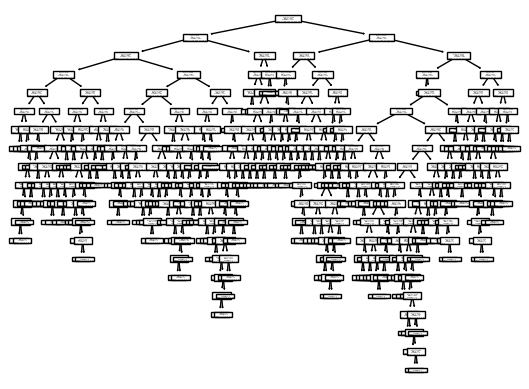

In [88]:
# Impresion de la variable dependiente de entrenamiento
plot_tree(arbol)

In [89]:
# Impresion de la predicción del modelo de logistica
print ( "EL modelo de predicción: ")
Predicciones = arbol.predict(X_test)
Predicciones

EL modelo de predicción: 


array([7, 6, 5, 5, 5, 5, 7, 6, 5, 5, 5, 7, 7, 5, 6, 7, 5, 5, 5, 6, 5, 6,
       7, 6, 6, 6, 6, 5, 6, 5, 4, 7, 4, 6, 5, 6, 5, 5, 6, 5, 6, 5, 7, 5,
       6, 5, 5, 5, 5, 6, 6, 5, 8, 8, 6, 6, 6, 6, 6, 4, 5, 6, 5, 7, 6, 6,
       5, 6, 6, 5, 6, 6, 5, 6, 7, 6, 6, 5, 7, 5, 7, 6, 5, 5, 7, 5, 5, 6,
       6, 6, 5, 5, 7, 6, 5, 6, 5, 6, 7, 6, 6, 7, 6, 5, 7, 7, 5, 6, 5, 5,
       6, 5, 6, 6, 5, 7, 6, 5, 5, 5, 6, 6, 6, 7, 6, 8, 6, 5, 7, 5, 6, 6,
       6, 5, 8, 5, 6, 7, 7, 5, 6, 7, 5, 6, 5, 3, 6, 5, 7, 5, 6, 5, 5, 6,
       6, 7, 6, 7, 6, 5, 5, 6, 5, 6, 5, 5, 6, 6, 5, 6, 6, 5, 5, 5, 5, 6,
       7, 5, 5, 5, 6, 6, 4, 6, 8, 5, 5, 7, 6, 5, 6, 6, 5, 7, 6, 5, 6, 5,
       4, 7, 7, 5, 6, 5, 6, 5, 7, 5, 7, 7, 7, 6, 6, 5, 6, 5, 4, 5, 6, 6,
       6, 5, 5, 5, 7, 6, 7, 5, 5, 6, 6, 6, 5, 5, 4, 5, 5, 6, 6, 6, 6, 6,
       6, 5, 5, 7, 5, 6, 5, 5, 5, 5, 5, 6, 7, 5, 5, 5, 7, 6, 6, 5, 7, 6,
       5, 5, 5, 6, 5, 6, 7, 6, 5, 6, 6, 5, 6, 7, 5, 5, 5, 5, 7, 6, 6, 6,
       5, 5, 6, 5, 6, 6, 6], dtype=int64)

<h3><b>6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc.</b></h3>

In [90]:
# Desempeño del modelo de arbol de decision
print(classification_report(Y_test,Predicciones))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         6
           5       0.68      0.62      0.65       130
           6       0.63      0.59      0.61       123
           7       0.40      0.58      0.47        31
           8       0.00      0.00      0.00         2

    accuracy                           0.59       293
   macro avg       0.28      0.30      0.29       293
weighted avg       0.61      0.59      0.60       293



In [91]:
# Desempeño del modelo de arbol de decision
accuracy = accuracy_score(Y_test,Predicciones)
accuracy

0.5870307167235495

<h3><b>7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.</b></h3>

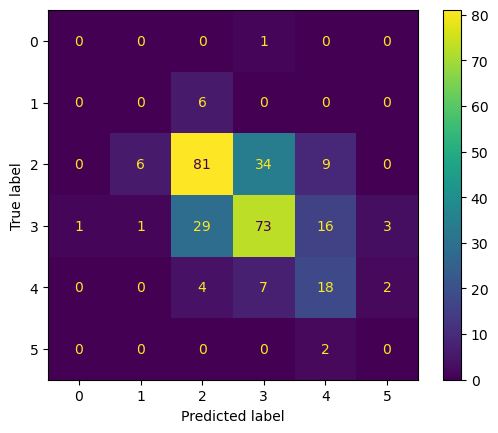

In [92]:
#Matrix de Confusión del modelo
cm=confusion_matrix(Y_test,Predicciones)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

<Axes: ylabel='Calidad'>

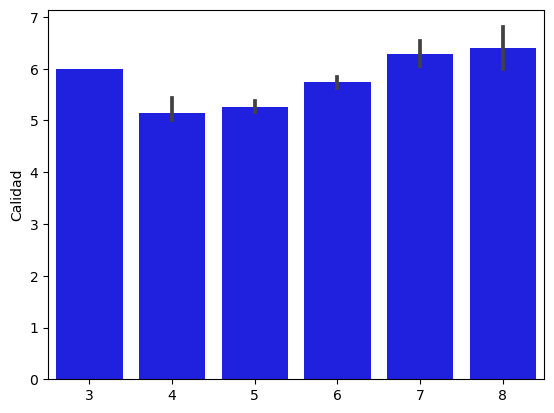

In [93]:
#Matrix de barra prediciones
sns.barplot(x=Predicciones, y=Y_test, color='b')

<h3><b>8. Interpretar, analizar y documentar los resultados obtenidos.</b></h3>

<b>Del desempeño del modelo se puede describir</b>:
<ol>
<li>Precisión: Precisión mide la proporción de predicciones positivas verdaderas entre todas las predicciones positivas realizadas por el modelo. Aquí la precisión para la clase "Calidad" es 0,60, lo que significa que el 60% de los predichos como problemas de los vinos por el modelo.</li>
<li>Recall: Mide la proporción de predicciones positivas verdaderas entre todas las instancias positivas reales en el conjunto de datos. Aquí el Recall para la clase "Calidad" es 0,60, obteniendo como resultado (0 60%, 65%, 58%), lo que indica que el modelo identificó correctamente al 60% de todos los vinos.</li>
<li>F1 Score: Es la media armónica de precisión y recuperación. Proporciona una puntuación única que equilibra la Precisión y Recall. Aquí la puntuación F1 para la clase de vinos en su caracteristica de "Calidad" es 60% obteniendo como resultado 60%, lo que indica un equilibrio entre precisión y recuerdo.</li>
</ol>

<b>De la Matriz de confusión se puede interpretar</b>:
<ol>
<li>Verdaderos negativos: el recuento de observaciones que un clasificador predijo correctamente</li>
<li>Verdaderos positivos: el recuento de observaciones que un clasificador predijo correctamente</li> 
<li>Falsos positivos: el recuento de observaciones que un clasificador predijo incorrectamente</li>
<li>Falsos negativos: el recuento de observaciones que un clasificador predijo incorrectamente</li>
</ol>

<b>De la curva de precisión del modelo se puede interpretar:<b><ol>
<li>El AUC es 0,60 lo que significa que el 60% de las predicciones del clasificador son correctas en todos los umbrales de clasificación.
</li>
</ol>